In [ ]:
import pandas as pd
import altair as alt
from vega_datasets import data
import seaborn as sns

In [ ]:
source = data.cars()

In [ ]:
alt.Chart(source).mark_circle(size=60).encode(    
    x='Horsepower',    
    y='Miles_per_Gallon',    
    color='Origin',    
    tooltip=["Name", "Horsepower", "Miles_per_Gallon"]).interactive()

alt.Chart(...)

Utwórz wykres wraz ze średnią ruchomą (dla kolumny Adj Close) w 2 wariantach:
- Pandas pd.rolling_mean
- altair

In [ ]:
yahoo_data = pd.read_csv('yahoo.csv')

In [ ]:
yahoo_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-05-25,23.230000,23.389999,22.959999,22.990000,21.618841,59500
1,2016-05-26,23.059999,23.110001,22.860001,22.900000,21.534210,59800
2,2016-05-27,22.850000,23.320000,22.850000,23.209999,21.825720,290500
3,2016-05-31,23.309999,23.740000,23.180000,23.540001,22.136036,82600
4,2016-06-01,23.400000,23.670000,23.320000,23.650000,22.239477,61800


In [ ]:
adj_close = yahoo_finance["Adj Close"] 
display(adj_close)

0       21.618841
1       21.534210
2       21.825720
3       22.136036
4       22.239477
          ...    
1253    37.439999
1254    37.439999
1255    37.950001
1256    38.250000
1257    38.250000
Name: Adj Close, Length: 1258, dtype: float64

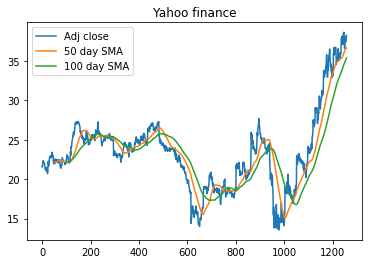

In [ ]:
adj_close.name = 'Adj close'
adj_close_50ma = adj_close.rolling(50).mean()
adj_close_50ma.name = '50 day SMA'
adj_close_100ma = adj_close.rolling(100).mean()
adj_close_100ma.name = '100 day SMA'
adj_close.plot(title='Yahoo finance', legend=True);adj_close_50ma.plot(legend=True);adj_close_100ma.plot(legend=True)

In [ ]:
line = alt.Chart(yahoo_finance).mark_line( 
    color='red',
    size=3
).transform_window(
    rolling_mean='mean(Adj Close)', 
    frame=[-15, 15]
).encode( 
    x='Date:T',
    y='rolling_mean:Q'
)


points = alt.Chart(yahoo_finance).mark_point().encode(
    x='Date:T',
    y=alt.Y('Adj Close:Q',
            axis=alt.Axis(title='Adj Close'))
)

alt.layer(points + line).interactive()

alt.LayerChart(...)